In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/Train.csv")

In [8]:
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
Y = train['target']

## Duplicates and Missing Values

In [5]:
train.duplicated().value_counts()

False    30557
Name: count, dtype: int64

In [10]:
train.shape

(30557, 82)

<Axes: >

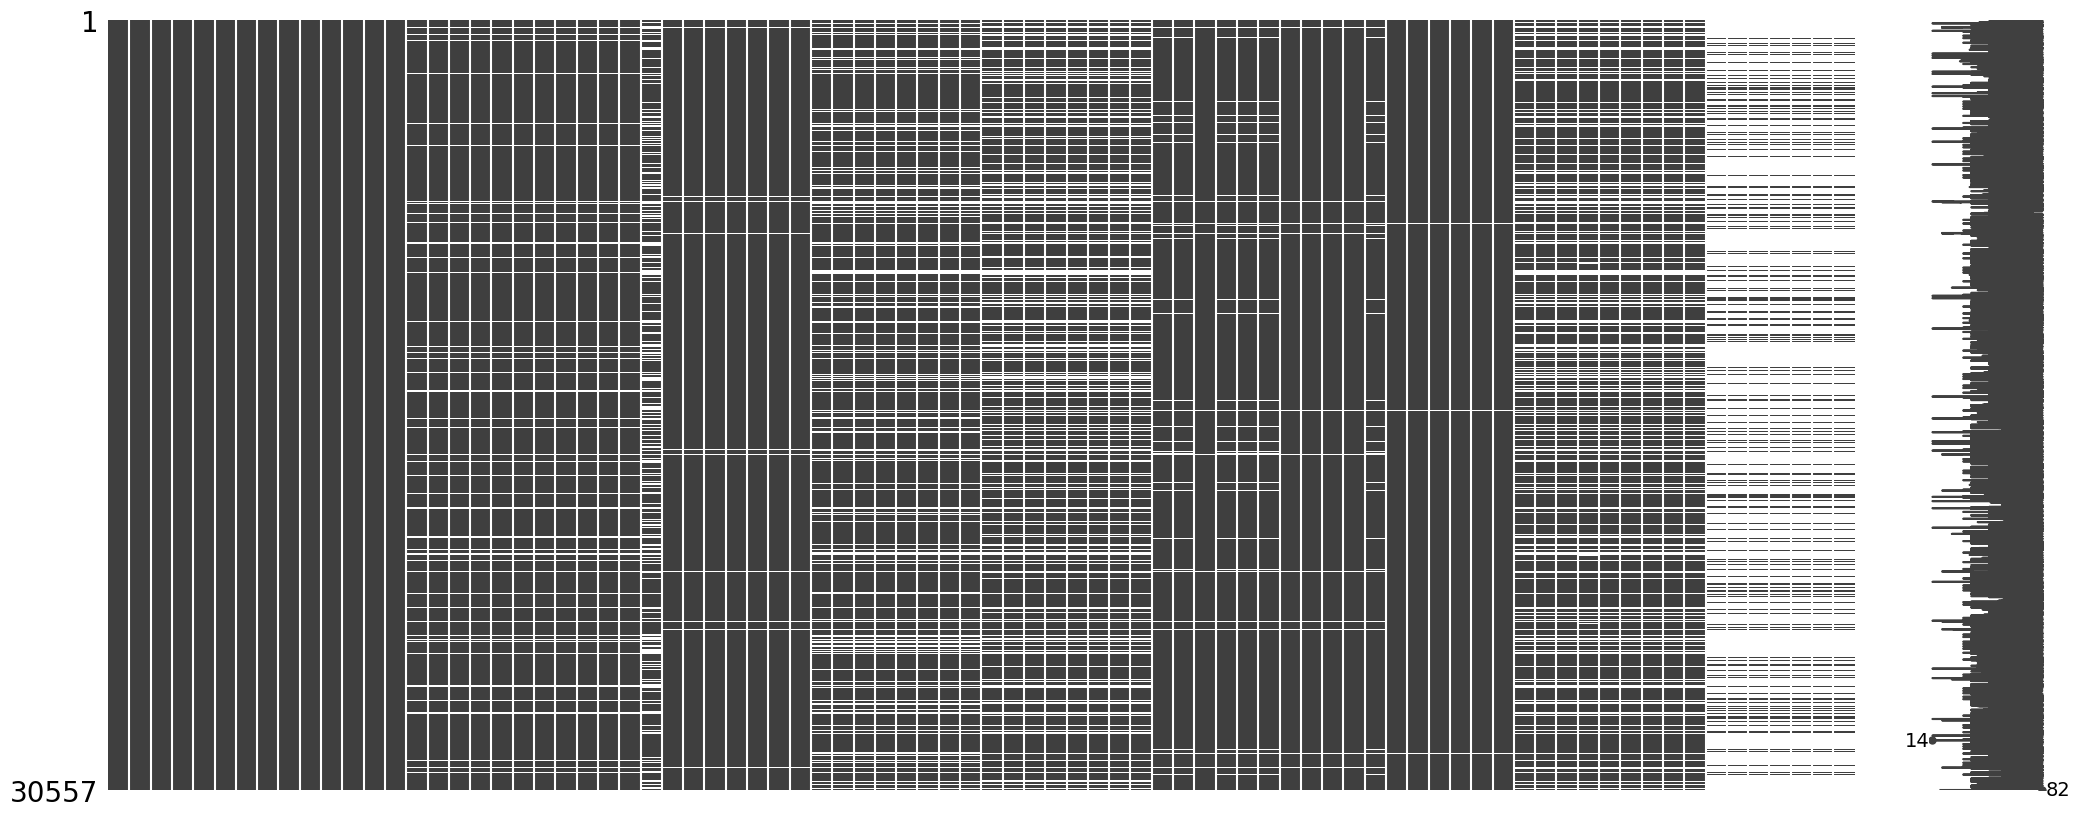

In [6]:
msno.matrix(train)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

## Data Imputation

In the following section we are investigating columns on whether they have zero or lower values, where it is not meaningful. For this purpose we derive a csv/list of column names where zeros or lower values are possible as minimum value. We get this information from the column description data provided on the original resource websites of the datasets. 

After figuring out which columns have zero values in general, we check those columns against the previously imported list. According to the result we generate two new lists: one containing the columns where zeros are ok to occur (zeros_ok_list), the other containing the columns where zeros need to be handled (imputation_list).

In [20]:
columns_with_zero = train.columns[train.eq(0).any()]
list(columns_with_zero)

['target_variance',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angl

In [65]:
#Import csv containing column names where values <=0 are meaningful and therefore allowed (filtered from google sheets file)
columns_where_zero_ok = list(pd.read_csv("air_pollution_columns_where_zero_ok.csv").loc[:, 'Column Name'])

In [66]:
columns_where_zero_ok

['L3_AER_AI_absorbing_aerosol_index',
 'L3_AER_AI_sensor_azimuth_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_sensor_azimuth_angle',
 'L3_CLOUD_solar_azimuth_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_SO2_slant_column_number_density',
 'L3_SO2_absorbing_aerosol_index',
 'L3_SO2_cloud_fraction',
 'L3_SO2_sensor_

In [67]:
#compare list1 of columns with zeros with list2 of columns where <=zero values are allowed. 
#If item of list1 not included in list2, create new list "imputation_list" with all columns where <=zero values are not allowed, hence need to be imputed
#else append to zeros_ok_list

#list of columns where <=zeros should be imputed
imputation_list = []

#list of columns where <=zeros are ok
zeros_ok_list = []

for column in columns_with_zero:
    if not column in columns_where_zero_ok:
        imputation_list.append(column)
    else:
        zeros_ok_list.append(column)


In [68]:
imputation_list

['target_variance',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_sensor_zenith_angle',
 'L3_HCHO_solar_zenith_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_SO2_SO2_column_number_density_amf',
 'L3_SO2_sensor_zenith_angle',
 'L3_SO2_solar_zenith_angle',
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
 'L3_CH4_aerosol_height',
 'L3_CH4_aerosol_optical_depth',
 'L3_CH4_sensor_zenith_angle',
 'L3_CH4_solar_zenith_angle']

In [69]:
zeros_ok_list

['L3_NO2_NO2_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_CLOUD_cloud_fraction',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_SO2_slant_column_number_density',
 'L3_SO2_absorbing_aerosol_index',
 'L3_SO2_cloud_fraction',
 'L3_SO2_sensor_azimuth_angle',
 'L3_SO2_solar_azimuth_angle',
 'L3_CH4_sensor_azimuth_angle',
 'L3_CH4_solar_azimuth_angle']

In [70]:
#cross check whether zeros_ok_list is <= columns_where_zero_ok --> shouldn't be longer
len(zeros_ok_list) <= len(columns_where_zero_ok)

True

In [71]:
#cross check whether both created lists share any identical items using set intersection
intersect = set(zeros_ok_list) & set(imputation_list)

if len(intersect) > 0:
    print("The lists have identical items:", intersect)
else:
    print("The lists have no identical items.")

The lists have no identical items.
